### Import libraries

In [2]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [4]:
# Sampling frequency 4Hz ~= 0.25s
#6/27/2018
fl_eda_4 = pd.read_csv('../data/day_3/EDA.csv' , header= None)
fl_eda_4.columns  = ['eda']
fl_eda_freq_4 = fl_eda_4.iloc[1].values
print(len(fl_eda_4))
print('freq: ', fl_eda_freq_4)
fl_eda_4.head(10)

6764
freq:  [4.]


,eda
0,1.530318e+09
1,4.000000e+00
2,0.000000e+00
3,8.148780e-01
4,8.356440e-01
5,7.805510e-01
6,7.908010e-01
7,7.972070e-01
8,8.074570e-01
9,8.087380e-01


In [5]:
print(len(fl_eda_4))
fl_eda_4.head(5)

6764


,eda
0,1.530318e+09
1,4.000000e+00
2,0.000000e+00
3,8.148780e-01
4,8.356440e-01


## Convert time

In [6]:
fl_init_time_4 = datetime.datetime.fromtimestamp(fl_eda_4.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_4

'2018-06-29 17:27:22'

In [7]:
fl_eda_4 = fl_eda_4.iloc[3:]

In [8]:
fl_time_eda_4 = pd.date_range(start=fl_init_time_4, periods=len(fl_eda_4), 
                              freq=str(1/int(fl_eda_freq_4))+'S')
fl_time_eda_4

DatetimeIndex([       '2018-06-29 17:27:22', '2018-06-29 17:27:22.250000',
               '2018-06-29 17:27:22.500000', '2018-06-29 17:27:22.750000',
                      '2018-06-29 17:27:23', '2018-06-29 17:27:23.250000',
               '2018-06-29 17:27:23.500000', '2018-06-29 17:27:23.750000',
                      '2018-06-29 17:27:24', '2018-06-29 17:27:24.250000',
               ...
               '2018-06-29 17:55:29.750000',        '2018-06-29 17:55:30',
               '2018-06-29 17:55:30.250000', '2018-06-29 17:55:30.500000',
               '2018-06-29 17:55:30.750000',        '2018-06-29 17:55:31',
               '2018-06-29 17:55:31.250000', '2018-06-29 17:55:31.500000',
               '2018-06-29 17:55:31.750000',        '2018-06-29 17:55:32'],
              dtype='datetime64[ns]', length=6761, freq='250L')

In [10]:
fl_eda_4 = fl_eda_4.set_index(fl_time_eda_4, drop =True)
fl_eda_4 = fl_eda_4[:]
fl_eda_4 = fl_eda_4.dropna()
print(len(fl_eda_4))
fl_eda_4.head()

6761


,eda
2018-06-29 17:27:22.000,0.814878
2018-06-29 17:27:22.250,0.835644
2018-06-29 17:27:22.500,0.780551
2018-06-29 17:27:22.750,0.790801
2018-06-29 17:27:23.000,0.797207


# Remove outliers

In [11]:
fl_exp4 = fl_eda_4.copy()#example dataset of normally distributed data. 


fl_exp4 = fl_exp4[np.abs(fl_exp4.eda-fl_exp4.eda.mean())<=(3*fl_exp4.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp4 = fl_exp4[~(np.abs(fl_exp4.eda-fl_exp4.eda.mean())>(3*fl_exp4.eda.std()))] #or if you prefer the other way around
fl_exp4 = fl_exp4.dropna()
print(len(fl_exp4))
fl_exp4.head()

6759


,eda
2018-06-29 17:27:22.000,0.814878
2018-06-29 17:27:22.250,0.835644
2018-06-29 17:27:22.500,0.780551
2018-06-29 17:27:22.750,0.790801
2018-06-29 17:27:23.000,0.797207


## Time marks

In [12]:
tags_4 = pd.read_csv('../data/marks/6.29.csv' , header= None)
tags_4 = tags_4.drop(tags_4.columns[2],axis=1)
tags_4.columns  =  ['tagged_time','presence']
tags_4.head()

,tagged_time,presence
0,2018-06-29 17:54:21.252,0
1,2018-06-29 17:54:12.508,0
2,2018-06-29 17:54:11.960,0
3,2018-06-29 17:54:10.855,0
4,2018-06-29 17:51:16.525,0


In [14]:
tags_4.tagged_time[0]

'2018-06-29 17:54:21.252'

## Separate Data

In [18]:
cat_4 = fl_exp4.loc['2018-06-29 17:28:30.000':'2018-06-29 17:38:55.000']
cat_4.head()

,eda
2018-06-29 17:28:30.000,0.599894
2018-06-29 17:28:30.250,0.602456
2018-06-29 17:28:30.500,0.584519
2018-06-29 17:28:30.750,0.575550
2018-06-29 17:28:31.000,0.548644


# Visualization

0.6403115694888178


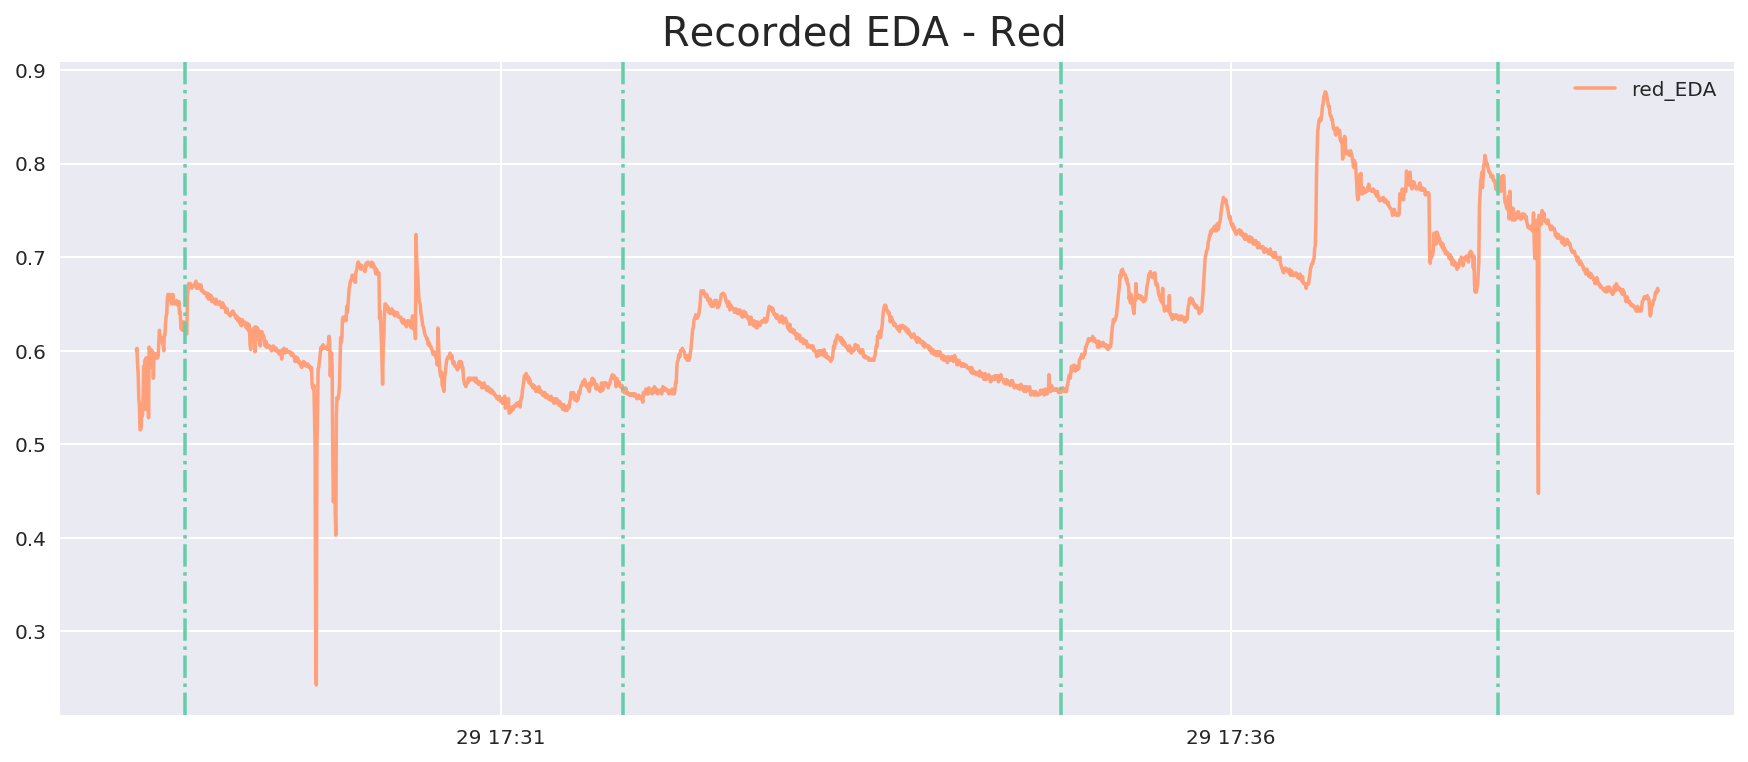

In [31]:
plt.figure(figsize=(15,6))
plt.plot(cat_4['eda'],color ='lightsalmon')
plt.figtext(.5,.9,'Recorded EDA - Red ', fontsize=20, ha='center')
plt.legend(['red_EDA'],loc=1,fontsize='medium')
plt.axvline(x = '2018-06-29 17:28:50.000',color = 'mediumaquamarine',linestyle='-.')
plt.axvline(x = '2018-06-29 17:31:50.000',color = 'mediumaquamarine',linestyle='-.')
plt.axvline(x = '2018-06-29 17:34:50.000',color = 'mediumaquamarine',linestyle='-.')
plt.axvline(x = '2018-06-29 17:37:50.000',color = 'mediumaquamarine',linestyle='-.')
# # plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')

eda_mean = np.mean(cat_4.eda)
print(eda_mean)
# plt.axhline(y = eda_mean, color = 'lightsalmon', linestyle = '--')
plt.savefig('red-eda.png', transparent=True)
plt.show()


# cvxEDA

In [32]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [33]:
y2 = np.asarray(cat_4.eda)
y2[:10]

array([0.599894, 0.602456, 0.584519, 0.57555 , 0.548644, 0.542237,
       0.515331, 0.515331, 0.517893, 0.535831])

In [34]:
yn2 = (y2 - y2.mean()) / y2.std()
Fs = 4.
[r2, p2, t2, l2, d2, e2, obj2] = cvxEDA.cvxEDA(yn2, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm2 = pl.arange(1., len(y2)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -1.2015e+03 -1.1792e+03  7e+03  8e+01  5e-01
 1: -1.2123e+03 -2.3002e+03  1e+03  2e+01  1e-01
 2: -1.2230e+03 -1.9321e+03  8e+02  8e+00  5e-02
 3: -1.2287e+03 -1.4521e+03  2e+02  2e+00  1e-02
 4: -1.2316e+03 -1.3711e+03  1e+02  1e+00  6e-03
 5: -1.2333e+03 -1.3088e+03  8e+01  4e-01  3e-03
 6: -1.2339e+03 -1.2772e+03  4e+01  2e-01  1e-03
 7: -1.2344e+03 -1.2455e+03  1e+01  2e-02  1e-04
 8: -1.2380e+03 -1.2409e+03  3e+00  2e-03  1e-05
 9: -1.2388e+03 -1.2405e+03  2e+00  9e-04  6e-06
10: -1.2396e+03 -1.2402e+03  6e-01  2e-04  1e-06
11: -1.2399e+03 -1.2401e+03  2e-01  2e-05  1e-07
12: -1.2400e+03 -1.2401e+03  7e-02  5e-06  3e-08
13: -1.2400e+03 -1.2400e+03  2e-02  6e-07  4e-09
14: -1.2400e+03 -1.2400e+03  4e-03  1e-07  7e-10
15: -1.2400e+03 -1.2400e+03  7e-04  2e-08  1e-10
16: -1.2400e+03 -1.2400e+03  1e-04  2e-09  1e-11
17: -1.2400e+03 -1.2400e+03  3e-06  4e-11  2e-13
18: -1.2400e+03 -1.2400e+03  7e-08  8e-13  5e-14
Optimal solution foun

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


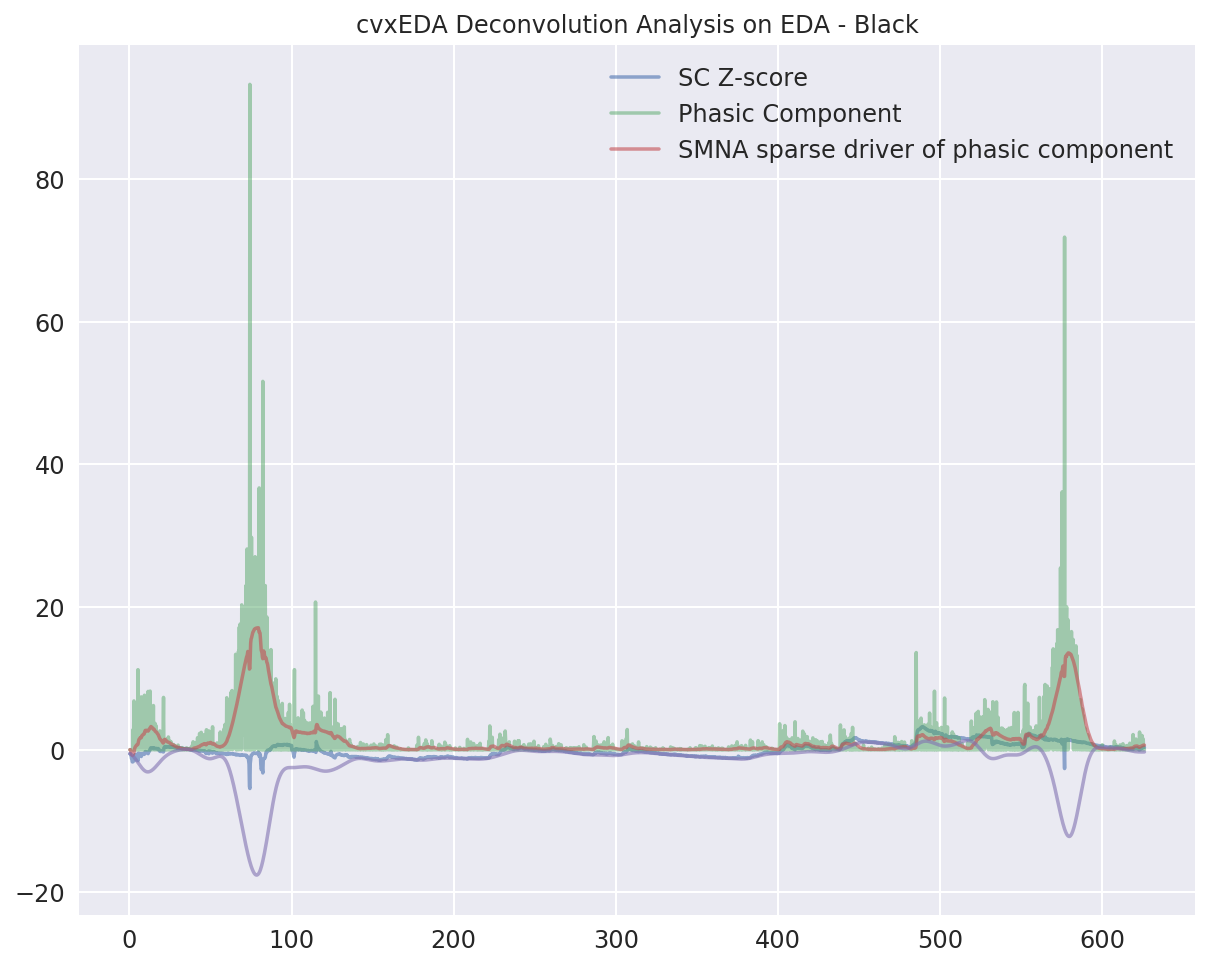

In [36]:
pl.hold(True)
pl.plot(tm2, yn2,alpha = 0.6)
pl.plot(tm2, p2,alpha = 0.5)
pl.plot(tm2, r2,alpha = 0.6)

pl.plot(tm2, t2,alpha = 0.6)


pl.title('cvxEDA Deconvolution Analysis on EDA - Black')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           ])
plt.savefig('black-cvxEDA.png', transparent=True)
plt.show()

## Logarithm 

In [41]:
fl_exp2['eda'] = np.log(fl_exp2['eda'])
fl_exp2.head(5)

,eda
2018-06-27 17:30:03.000,-0.181527
2018-06-27 17:30:03.250,0.166735
2018-06-27 17:30:03.500,0.482208
2018-06-27 17:30:03.750,0.740791
2018-06-27 17:30:04.000,0.789750


In [ ]:
log_eda_mean = np.mean(fl_exp2.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_2.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
plt.show()